In [110]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

In [112]:
#3rd dimension is rgb value

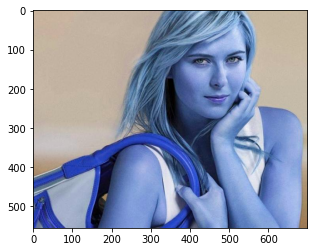

In [113]:
plt.imshow(img)

In [114]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [115]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

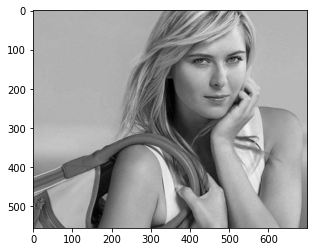

In [116]:
plt.imshow(gray,cmap="gray")

In [117]:
face_cascade = cv2.CascadeClassifier("./OpenCV/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('./OpenCV/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
faces

array([[355,  39, 230, 230]], dtype=int32)

In [118]:
#scaleFactor=1.1
# What it does: It specifies how much the image size is reduced at each image scale.

# Why it's needed: Faces can appear at different sizes in the image. To detect them all, OpenCV resizes the image multiple times.

# Meaning of 1.1: The image is reduced by 10% at each scale (i.e., 100%, 90%, 81%, etc.).

# Common values: Between 1.05 and 1.4.

# Lower value = more accuracy but slower.

# Higher value = faster but might miss some faces.
# minNeighbors=5
# What it does: Specifies how many neighbors each candidate rectangle should have to retain it.

# In simpler terms: It's a threshold for filtering false positives.

# Higher value = fewer detections (but more accurate).

# Lower value = more detections (but may include false positives).

In [119]:
#faces output is array of faces
#here it give one face as output
#that values refers to square(borders)

In [120]:
(x,y,w,h)=faces[0]
x,y,w,h

(355, 39, 230, 230)

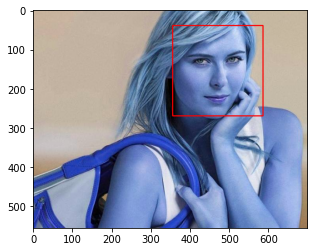

In [121]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [122]:
def detect_eyes(img):
    eye_img = img.copy()
    eye_rect = eye_cascade.detectMultiScale(eye_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in eye_rect:
        cv2.rectangle(eye_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
        
    return eye_img

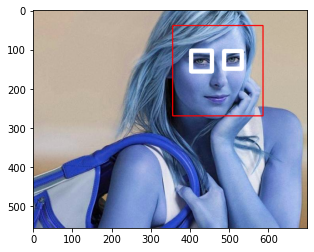

In [123]:
plt.imshow(detect_eyes(face_img))

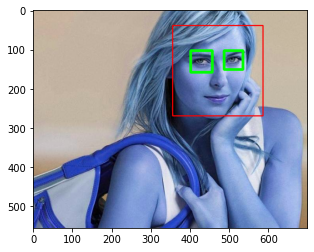

In [124]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.1,
    minNeighbors=10,
    minSize=(30, 30))
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

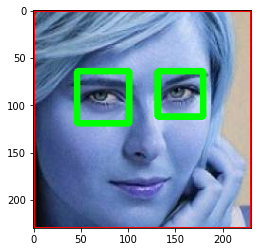

In [125]:
plt.imshow(roi_color,cmap='gray')

In [126]:
def get_cropped_image_if_2_eyes(img_path):
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

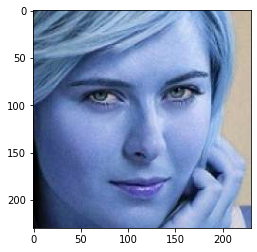

In [127]:
plt.imshow(get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg'))

In [128]:
cropped_img=get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
cropped_img

array([[[ 49,  68,  89],
        [ 57,  76,  97],
        [ 55,  74,  95],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 57,  76,  97],
        [ 55,  76,  97],
        [ 43,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       [[ 52,  71,  92],
        [ 49,  70,  91],
        [ 45,  69,  89],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[  1,   0,   2],
        [  7,   6,  10],
        [ 16,  15,  19],
        ...,
        [111, 131, 189],
        [ 98, 121, 183],
        [100, 124, 190]],

       [[  0,   0,   1],
        [  5,   4,   8],
        [ 12,  11,  15],
        ...,
        [109, 129, 186],
        [ 99, 122, 184],
        [101, 125, 191]],

       [[  0,   0,   1],
        [  4,   3,   7],
        [  8,   7,  11],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]]

In [129]:
# as the above image not having 2 eyes so its does not return anything

In [130]:
path_to_data="./dataset"
path_to_cr_data="./dataset/cropped"

In [131]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
#os.scandir(path_to_data):
# read all directories in the dataset
#if entry is directory it add all full path

In [132]:
img_dirs

['./dataset/.ipynb_checkpoints',
 './dataset/serena_williams',
 './dataset/lionel_messi',
 './dataset/roger_federer',
 './dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/cropped']

In [133]:
img_dirs=img_dirs[1:len(img_dirs)-1]
img_dirs

['./dataset/serena_williams',
 './dataset/lionel_messi',
 './dataset/roger_federer',
 './dataset/maria_sharapova',
 './dataset/virat_kohli']

In [134]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [135]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
#     print(celebrity_name)
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('jpg','jpeg','png')):
            roi_color=get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder=path_to_cr_data+'/'+celebrity_name
                if not os.path.exists(cropped_folder):
                    os.mkdir(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(cropped_folder)
                cropped_file_name=celebrity_name+str(count)+'.png'
                cropped_file_path=cropped_folder+'/'+cropped_file_name
                cv2.imwrite(cropped_file_path,roi_color)
                #above line is the method in OpenCV that saves image to specifies path
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count+=1
                
        

./dataset/cropped/serena_williams
./dataset/cropped/lionel_messi
./dataset/cropped/roger_federer
./dataset/cropped/maria_sharapova
./dataset/cropped/virat_kohli


In [136]:
celebrity_file_names_dict

{'serena_williams': ['./dataset/cropped/serena_williams/serena_williams1.png',
  './dataset/cropped/serena_williams/serena_williams2.png',
  './dataset/cropped/serena_williams/serena_williams3.png',
  './dataset/cropped/serena_williams/serena_williams4.png',
  './dataset/cropped/serena_williams/serena_williams5.png',
  './dataset/cropped/serena_williams/serena_williams6.png',
  './dataset/cropped/serena_williams/serena_williams7.png',
  './dataset/cropped/serena_williams/serena_williams8.png',
  './dataset/cropped/serena_williams/serena_williams9.png',
  './dataset/cropped/serena_williams/serena_williams10.png',
  './dataset/cropped/serena_williams/serena_williams11.png',
  './dataset/cropped/serena_williams/serena_williams12.png',
  './dataset/cropped/serena_williams/serena_williams13.png',
  './dataset/cropped/serena_williams/serena_williams14.png',
  './dataset/cropped/serena_williams/serena_williams15.png',
  './dataset/cropped/serena_williams/serena_williams16.png',
  './dataset/c

In [ ]:
 Wavelet Transformation — Explained Simply

Wavelet Transformation is a signal processing technique used to analyze data at different frequency scales and locations. It’s especially useful in image processing, compression, denoising, and feature extraction.
📌 What Is It?

Imagine you want to analyze an image (or a signal) not just for what frequencies are present (like Fourier Transform), but also where those frequencies occur. That’s where Wavelet Transform shines.

    It breaks down a signal/image into high-frequency and low-frequency components.

    Unlike Fourier Transform, which uses sinusoids, Wavelet Transform uses small wave-like functions (wavelets) that are localized in both time and frequency.

🧠 Two Main Types:

    Continuous Wavelet Transform (CWT) – More theoretical, used in signal analysis.

    Discrete Wavelet Transform (DWT) – Most commonly used in practice, especially in image processing.

🧾 In Image Processing:

In a 2D image:

    Low-frequency components represent general shapes (approximation).

    High-frequency components represent details like edges (horizontal, vertical, diagonal).

This is often represented using sub-bands:

| A  | H |
| V  | D |

    A = Approximation (LL)

    H = Horizontal details (LH)

    V = Vertical details (HL)

    D = Diagonal details (HH)

✅ Use Cases:

    Face recognition (used with Haar wavelets)

    Image compression (e.g., JPEG2000 uses DWT)

    Denoising noisy signals/images

    Feature extraction for ML models



In [144]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255

    # Wavelet Transform
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] = np.zeros_like(coeffs_H[0])  # remove approximation

    # Inverse transform using detail coefficients only
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

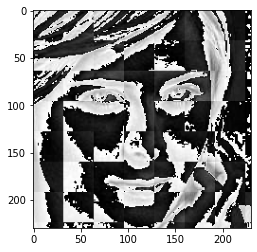

In [145]:
img_har=w2d(cropped_img,'db1',5)
plt.imshow(img_har,cmap="gray")

In [146]:
img=cv2.imread('./dataset/cropped/lionel_messi_-_Google_Search/lionel_messi_-_Google_Search13.png')
img_har=w2d(img,'db1',5)
plt.imshow(img_har,cmap="gray")

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [147]:
#get unique number for each celebrity
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
    
class_dict

{'serena_williams': 0,
 'lionel_messi': 1,
 'roger_federer': 2,
 'maria_sharapova': 3,
 'virat_kohli': 4}

In [149]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))#to ensure all images of same size
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [150]:
# The shape (32*32*3, 1) = (3072, 1) is used to flatten a color image and convert it into a column vector.
# 3 represents RGB channel

In [151]:
x
#32*32*3+32*32
#32*32->x and y of raw image 3 for color
#32*32 is gray scale

[array([[ 77],
        [111],
        [180],
        ...,
        [ 42],
        [134],
        [ 73]], dtype=uint8),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8),
 array([[19],
        [27],
        [45],
        ...,
        [ 1],
        [ 0],
        [ 0]], dtype=uint8),
 array([[ 35],
        [ 48],
        [ 64],
        ...,
        [247],
        [  1],
        [  3]], dtype=uint8),
 array([[ 15],
        [ 15],
        [ 15],
        ...,
        [227],
        [253],
        [240]], dtype=uint8),
 array([[ 34],
        [ 39],
        [ 64],
        ...,
        [217],
        [255],
        [195]], dtype=uint8),
 array([[ 40],
        [ 41],
        [ 49],
        ...,
        [251],
        [143],
        [  0]], dtype=uint8),
 array([[ 27],
        [ 30],
        [ 45],
        ...,
        [210],
        [117],
        [207]], dtype=uint8),
 array([[132],
        [104],
        [105],
        ...,
        [  0],
 

In [152]:
print(len(x[0]))
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

4096


(198, 4096)

In [153]:
x[0]

array([ 77., 111., 180., ...,  42., 134.,  73.])

In [154]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [155]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [156]:
pipe=Pipeline([('scalar',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [157]:
# This code creates a machine learning pipeline using sklearn.pipeline.Pipeline. A pipeline chains together multiple processing steps, so you can treat them like one model.

In [158]:
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.66

In [159]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.80      0.44      0.57         9
           2       0.25      0.25      0.25         4
           3       0.68      0.76      0.72        17
           4       0.79      1.00      0.88        11

    accuracy                           0.66        50
   macro avg       0.60      0.58      0.58        50
weighted avg       0.66      0.66      0.65        50



In [160]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pipe.predict(X_test)))

[[ 4  0  1  3  1]
 [ 1  4  0  2  2]
 [ 1  1  1  1  0]
 [ 2  0  2 13  0]
 [ 0  0  0  0 11]]


In [161]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}


In [162]:
# https://chatgpt.com/c/682e67c9-c288-8006-bc00-6daaa2afef4d

In [163]:
from sklearn.pipeline import make_pipeline
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.811494,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.662069,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.831034,{'logisticregression__C': 1}


In [164]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [165]:
best_estimators['svm'].score(X_test,y_test)

0.78

In [166]:
best_estimators['random_forest'].score(X_test,y_test)

0.54

In [167]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.78

In [168]:
best_clf=best_estimators['svm']

In [169]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 5,  0,  1,  3,  0],
       [ 1,  6,  0,  2,  0],
       [ 1,  0,  3,  0,  0],
       [ 1,  0,  2, 14,  0],
       [ 0,  0,  0,  0, 11]])

Text(69.0, 0.5, 'actual')

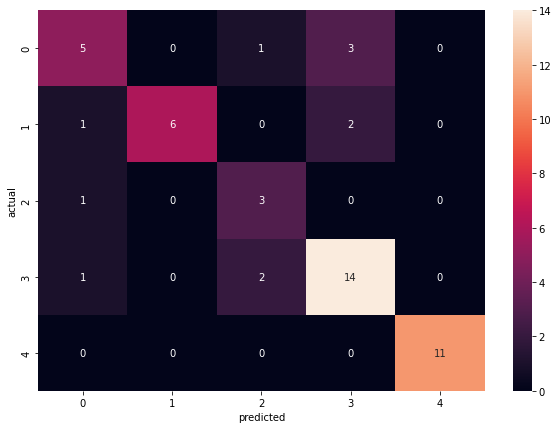

In [170]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [171]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [172]:
import json
with open('class_dictionary.json','w')as f:
    json.dump(class_dict,f)